In [1]:
import numpy as np
import matplotlib.pyplot as plt

import openwind
print("OK!")

OK!


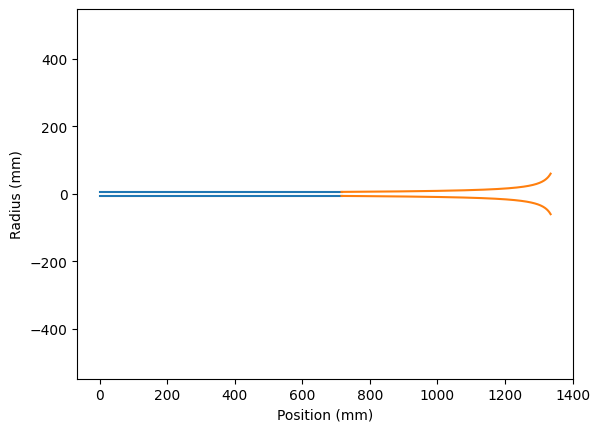

In [2]:
instru_geom = openwind.InstrumentGeometry('simplified-trumpet.csv')
instru_geom.plot_InstrumentGeometry()
plt.show()

c:\Users\alex-\python1\Lib\site-packages\openwind\impedance_computation.py:237: UserWarning: The default temperature is 25 degrees Celsius.
  warnings.warn('The default temperature is 25 degrees Celsius.')


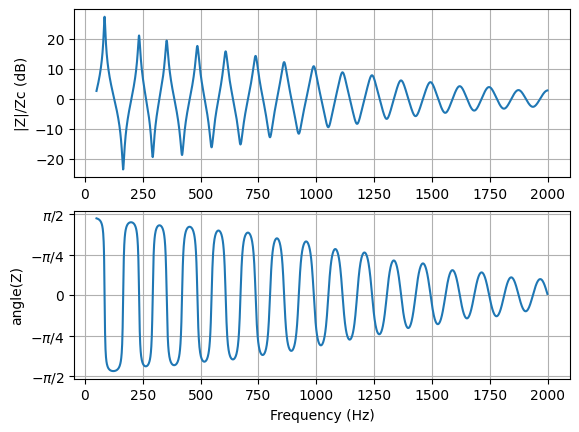

In [3]:
frequencies = np.arange(50,2000,1)
#Then, we can use ImpedanceComputation to compute and plot the impedance of the instrument.

result = openwind.ImpedanceComputation(frequencies, 'simplified-trumpet.csv')
result.plot_impedance()
plt.show()

In [4]:
result = openwind.ImpedanceComputation(frequencies, 'simplified-trumpet.csv', temperature=30)
#The peaks and dips of the resulting curve are slightly shifted toward higher frequencies, because the speed of sound has increased.

#Exporting the impedance to a file
#The impedance can be written to a file using function write_impedance:

result.write_impedance('impedance.txt')

In [5]:
my_player = openwind.Player("TUTORIAL_REED")
#Using this Player, we can launch a very short simulation of 0.5 seconds.

simulation = openwind.simulate(0.5, 'simplified-trumpet.csv', player=my_player)

c:\Users\alex-\python1\Lib\site-packages\openwind\temporal_simulation.py:117: UserWarning: The default temperature is 25 degrees Celsius.
  warnings.warn('The default temperature is 25 degrees Celsius.')


Using Theta scheme, theta = 0.25

Starting simulation! (Current time is 20:22:07 (29/04/2024))
n_steps = 44839
1% : 1m8s remaining
17% : 28s remaining
36% : 19s remaining
67% : 7s remaining
100%! Simulation ran for 19s, and stopped at 20:22:27 (29/04/2024).


<openwind.temporal.RecordingDevice (stopped, t=5.000e-01); values.keys()=['source_pressure', 'source_flow', 'source_y', 'bell_radiation_pressure', 'bell_radiation_flow', 'bell_radiation_y']; >


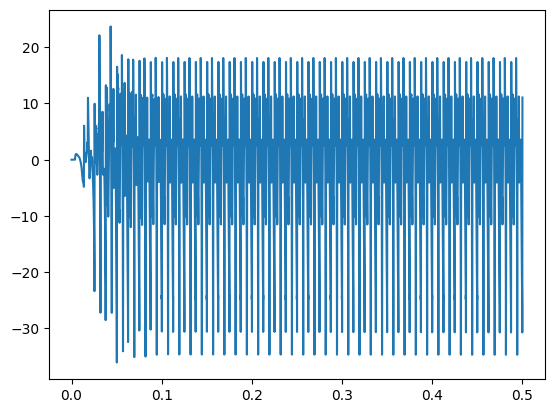

In [6]:
print(simulation)
#Plotting the waveform
#The sound that can be heard from the outside is the radiated pressure, so let us plot the evolution of 'bell_radiation_pressure' as a function of time. Time information is contained in simulation.ts, the array of the times at which data was sampled.

plt.figure()  # opens a new figure
plt.plot(simulation.ts, simulation.values['bell_radiation_pressure'])
plt.show()

In [18]:
from openwind.temporal.utils import export_mono
export_mono('my_trumpet_reed_simulation.wav', simulation.values['bell_radiation_pressure'], simulation.ts)

Wrote audio to my_trumpet_reed_simulation.wav


In [23]:
import wave
FRAMES_PER_SECOND = 1/(simulation.ts[2]-simulation.ts[1])

with wave.open("output.wav", mode="wb") as wav_file:
    wav_file.setnchannels(1)
    wav_file.setsampwidth(1)
    wav_file.setframerate(FRAMES_PER_SECOND)
    wav_file.writeframes(bytes(simulation.values['bell_radiation_pressure']))

In [26]:
from playsound import playsound
playsound('output.wav')



    Error 263 for command:
        close output.wav
    Podane urządzenie nie jest otwarte lub nie jest rozpoznawane przez MCI.
Failed to close the file: output.wav
